Mounted at /content/drive


Saving venice.png to venice (1).png
✅ Number of keypoints detected: 3788


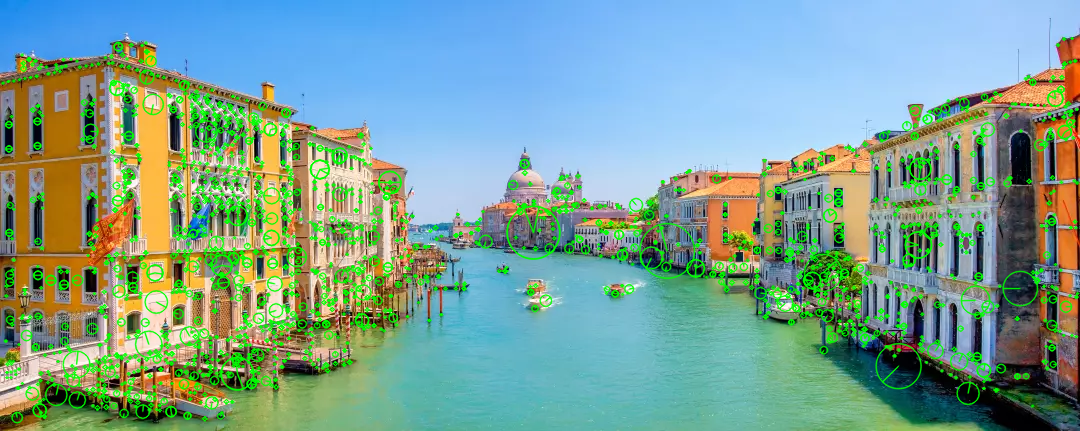

Showing 2342 strong keypoints (response > 0.03)
🔍 Strongest Keypoint Properties
Position (pt): (2.6131200790405273, 82.5597152709961)
Size (diameter): 2.03776478767395
Angle: 147.3872528076172
Response: 0.03873166814446449
Octave: 9110015
Class ID: -1


In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# آپلود تصویر
uploaded = files.upload()
filename = next(iter(uploaded))

# بارگذاری تصویر
img = cv2.imread(filename)
if img is None:
    raise ValueError("❌ Could not load image — please use a .png or .jpg file.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# ساخت SIFT detector
sift = cv2.SIFT_create()

# استخراج keypoints و descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

print(f"✅ Number of keypoints detected: {len(keypoints)}")

# فقط keypoints با response بالا نگه‌دار
threshold = 0.03  # می‌تونی این عدد رو تغییر بدی

strong_kps = [kp for kp in keypoints if kp.response > threshold]

# ترسیم keypoints قوی
img_strong = cv2.drawKeypoints(
    img, strong_kps, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255 , 0)
)

cv2_imshow(img_strong)
print(f"Showing {len(strong_kps)} strong keypoints (response > {threshold})")


if strong_kps:
    kp = strong_kps[0]
    print("🔍 Strongest Keypoint Properties")
    print(f"Position (pt): {kp.pt}")
    print(f"Size (diameter): {kp.size}")
    print(f"Angle: {kp.angle}")
    print(f"Response: {kp.response}")
    print(f"Octave: {kp.octave}")
    print(f"Class ID: {kp.class_id}")
else:
    print("❗ No strong keypoints above the threshold.")
